In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_results = pd.merge(study_results, mouse_metadata, on = "Mouse ID", how = "left")

# Display the data table for preview 
mouse_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [124]:
# Check the number of mice
mouse_count = mouse_study_results["Mouse ID"].nunique()
mouse_count

249

In [125]:
duplicate_mice = mouse_study_results.groupby(["Mouse ID"])["Timepoint"]
duplicate_mice.head()
# mouse_study_results.columns

0        0
1        0
2        0
3        0
4        0
        ..
1107    20
1108    20
1109    20
1110    20
1112    20
Name: Timepoint, Length: 1108, dtype: int64

In [126]:
# Get the duplicate mice by ID number shows up for Mouse ID and Timepoint

dup_mice = mouse_study_results[mouse_study_results.duplicated(["Mouse ID", "Timepoint"],keep= False)]
dup_mice

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [127]:
clean_mouse_study = mouse_study_results.loc[(mouse_study_results["Mouse ID"] != "g989")]
clean_mouse_count = clean_mouse_study["Mouse ID"].nunique()
clean_mouse_count

248

In [128]:
drug_stats_tumor = clean_mouse_study[["Drug Regimen", "Tumor Volume (mm3)"]]
drug_stats_tumor.head()

,Drug Regimen,Tumor Volume (mm3)
0,Capomulin,45.0
1,Ketapril,45.0
2,Ketapril,45.0
3,Ketapril,45.0
4,Ketapril,45.0


In [129]:
drug_stats_groupby_mean = drug_stats_tumor.groupby(["Drug Regimen"]).mean()\
.rename(columns = {"Tumor Volume (mm3)": "Mean Tumor Volume"})
drug_stats_groupby_median = drug_stats_tumor.groupby(["Drug Regimen"]).median()\
.rename(columns = {"Tumor Volume (mm3)": "Median Tumor Volume"})
drug_stats_groupby_var = drug_stats_tumor.groupby(["Drug Regimen"]).var()\
.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Variance"})
drug_stats_groupby_std = drug_stats_tumor.groupby(["Drug Regimen"]).std()\
.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
drug_stats_groupby_sem = drug_stats_tumor.groupby(["Drug Regimen"]).sem()\
.rename(columns = {"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

drug_stats_groupby = drug_stats_groupby_mean.join([drug_stats_groupby_median, 
                                                   drug_stats_groupby_var,
                                                   drug_stats_groupby_std, 
                                                   drug_stats_groupby_sem])
drug_stats_groupby



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [130]:
drug_stats_agg_groupby = drug_stats_tumor.groupby("Drug Regimen")


drug_stats_agg = drug_stats_agg_groupby[["Tumor Volume (mm3)"]].agg([np.mean, np.median, np.var, np.std, st.sem])

drug_stats_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

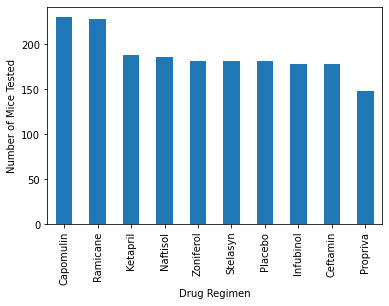

In [131]:
drug_timepoints = clean_mouse_study.groupby("Drug Regimen").count()["Timepoint"].sort_values(ascending=False)
drug_timepoint_barpd = drug_timepoints.plot(kind="bar")
drug_timepoint_barpd.set_xlabel("Drug Regimen")
drug_timepoint_barpd.set_ylabel("Number of Mice Tested")
plt.show()

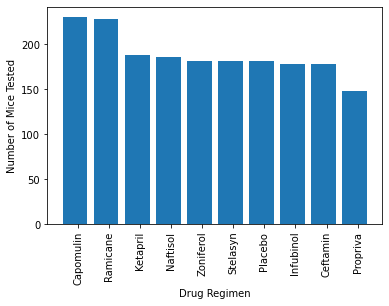

In [132]:
x_axis = np.arange(len(drug_timepoints))
tick_locations = [value+0.5 for value in x_axis]

plt.bar(x_axis, drug_timepoints, align="edge")
plt.xticks(tick_locations, drug_timepoints.index, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show()

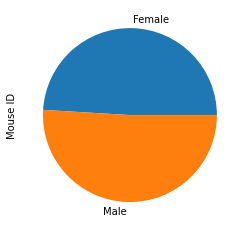

In [133]:
mice_distribution = clean_mouse_study.groupby("Sex").count()["Mouse ID"]

mice_distribution.plot(kind = "pie")

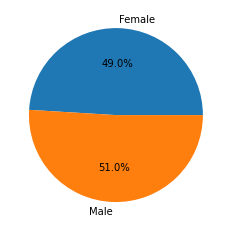

In [134]:
plt.pie(clean_mouse_study.groupby("Sex").count()["Mouse ID"], labels = ["Female", "Male"], autopct = "%1.1f%%")
plt.show()

In [135]:
# Capomulin = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin")]
# Capomulin_study = Capomulin.groupby("Mouse ID").max()["Timepoint"]

# Ramicane = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Ramicane")]
# Ramicane_study = Ramicane.groupby("Mouse ID").max()["Timepoint"]

# Infubinol = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin")]
# Infubinol_study = Infubinol.groupby("Mouse ID").max()["Timepoint"]

# Ceftamin = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin")]
# Ceftamin_study = Ceftamin.groupby("Mouse ID").max()["Timepoint"]

greatest_timepoint = pd.DataFrame(clean_mouse_study.groupby(["Mouse ID"]).max()["Timepoint"])
greatest_timepoint

tumor_at = clean_mouse_study.set_index("Mouse ID")

tumor_at_greatest_timepoint = greatest_timepoint.merge(tumor_at, how = "left")

# tumor_at_greatest_timepoint = greatest_timepoint.merge(clean_mouse_study, left_index)
# tumor_at_greatest_timepoint

In [136]:
focus_study_meds = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for med in focus_study_meds: 
    tumor_vol_data = []
    tumor_timepoint = tumor_at_greatest_timepoint.loc[(tumor_at_greatest_timepoint["Drug Regimen"] == med), "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_timepoint)
#     tumor_timepoint_data = tumor_at_greatest_timepoint["Drug Regimen"]                                                
    quartiles = tumor_timepoint.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_timepoint.loc[(tumor_at_greatest_timepoint["Timepoint"] < lower_bound) | tumor_at_greatest_timepoint["Timepoint"] > upper_bound]
    print(f"{med} outliers are {outliers}")
#     for value in tumor_vol_data: 
#         if value < lower_bound:
#             outliers.append(value)
#         elif value > upper_bound:
#             outliers.append(value)
        
#     print(f"The outliers for {med} are {outliers}")



#     for row in tumor_at_greatest_timepoint:
#             if tumor_at_greatest_timepoint["Drug Regimen"] == med:
#                 tumor_vol_data.append(tumor_at_greatest_timepoint.["Tumor Volume (mm3)"])
        
    

Capomulin outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin outliers are Series([], Name: Tumor Volume (mm3), dtype: float64)


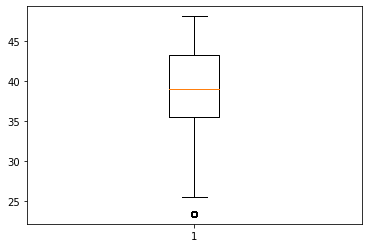

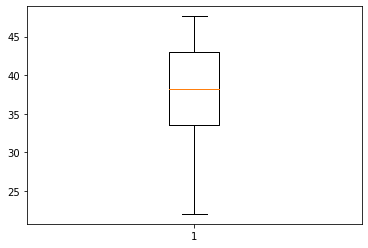

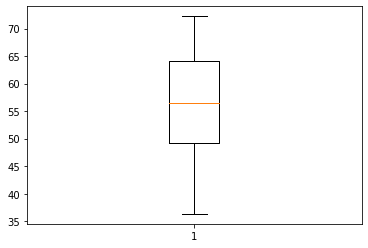

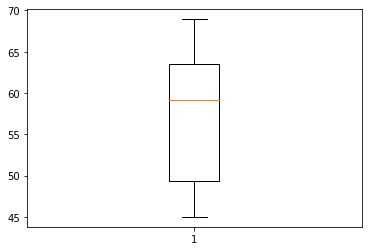

In [152]:
focus_study_meds = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_volumes = {}
for med in focus_study_meds: 
    tumor_volume_data = []
    
    tumor_timepoint = tumor_at_greatest_timepoint.loc[(tumor_at_greatest_timepoint["Drug Regimen"] == med), "Tumor Volume (mm3)"]
#     tumor_timepoint_df = tumor_at_greatest_timepoint.set_index("Drug Regimen")
#     tumor_timepoint = tumor_timepoint_df.loc[[],["Tumor Volume (mm3)"]]
    tumor_vol_data.append(tumor_timepoint)
#     tumor_timepoint_data = tumor_at_greatest_timepoint["Drug Regimen"]                                                
    quartiles = tumor_timepoint.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_timepoint.loc[(tumor_at_greatest_timepoint["Timepoint"] < lower_bound) |
                                   (tumor_at_greatest_timepoint["Timepoint"] > upper_bound)]
    
    tumor_volumes[med] = tumor_vol_data
    
    fig, ax = plt.subplots()
    ax.boxplot(tumor_timepoint)
# final_tumor_volumes = pd.DataFrame(tumor_volumes)
# final_tumor_volumes.head()

# tumor_volumes

# final_tumor_volumes.plot(kind = "box")
# final_tumor_volume = dict(zip(focus_study_meds, tumor_volumes))
# final_tumor_volume
# tumor_vol_data
# final_tumor_vol = pd.DataFrame(final_tumor_volume)

# final_tumor_vol.plot(kind = "box")
# fig, ax = plt.subplots(sharey = True, sharex = True)
# # box = ax.boxplot(data = final_tumor_volume)

# xvalues = focus_study_meds

# plt.xticks(np.arange(4), xvalues)
# for volume in final_tumor_volume:
#     box = ax.boxplot(volume)
# ax2.boxplot(final_tumor_volume["Ramicane"])
    
    
    
#     ax1.set_ylabel('Final Tumor Volume (mm3)')
#     ax1.boxplot(tumor_vol_data)
#     plt.show()
    
#     ax2.set_ylabel('Final Tumor Volume (mm3)')
#     ax2.boxplot(tumor_vol_data)
#     plt.show()
    
#     ax3.set_ylabel('Final Tumor Volume (mm3)')
#     ax3.boxplot(tumor_vol_data)
#     plt.show()
    
#     ax4.set_ylabel('Final Tumor Volume (mm3)')
#     ax4.boxplot(tumor_vol_data)
#     plt.show()

Text(0, 0.5, 'Tumor Volume (mm3)')

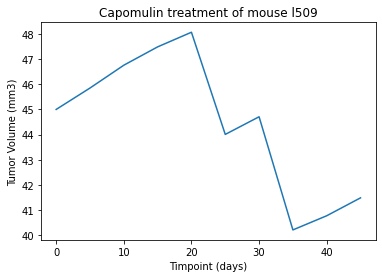

In [138]:
capomulin_data = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"] == "Capomulin"), :]

mouse_sample = capomulin_data.loc[(capomulin_data["Mouse ID"] == "l509")]

x_axis = mouse_sample["Timepoint"]
y_axis = mouse_sample["Tumor Volume (mm3)"]


plt.plot(x_axis, y_axis)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timpoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

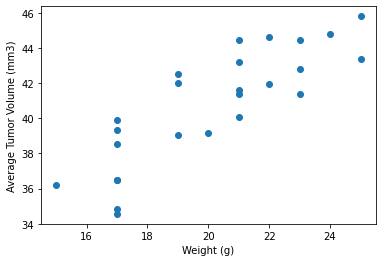

In [139]:
x_axis = capomulin_data.groupby("Mouse ID").mean()["Weight (g)"]
average_tumor_vol = capomulin_data.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
# average_tumor_vol
# x_axis
plt.scatter(x_axis, average_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

The correlation between mouse weight and the average tumor volume is 0.7088568047708717


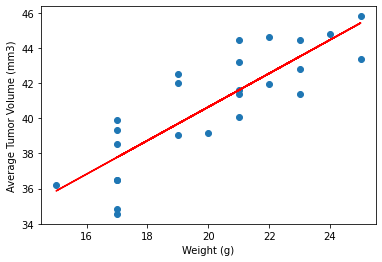

In [90]:
x_values = x_axis
y_values = average_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"The correlation between mouse weight and the average tumor volume is {rvalue**2}" )
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()